## Portfolio Optimization

Data
Notation
r
F
 denotes the risk-free rate
r
=
(
r
1
,
r
2
,
…
,
r
N
)
′
 denotes the vector of risky returns
μ
=
(
μ
1
,
μ
2
,
…
,
μ
N
)
′
 denotes the vector of expected returns
Σ
=
⎛
⎜
⎜
⎜
⎜
⎜
⎝
σ
1
,
1
σ
1
,
2
⋯
σ
1
,
N
σ
2
,
1
σ
2
,
2
⋯
σ
2
,
N
⋮
⋮
⋱
⋮
σ
N
,
1
σ
N
,
2
⋯
σ
N
,
N
⎞
⎟
⎟
⎟
⎟
⎟
⎠
 denotes the covariance matrix of returns
w
=
(
w
1
,
w
2
,
…
,
w
N
)
′
 denotes the vector of portfolio weights
ι
=
(
1
,
1
,
…
,
1
)
′
 denotes a vector of ones

#### Computing Mean and Variance

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline


In [3]:
tickers = ['AAPL', 'BA', 'C', 'GE', 'GM', 'JNJ', 'KO', 'WMT']
start_date = '2000-01-01'
stock_df = pdr.get_data_yahoo(symbols = tickers, start = start_date)

In [4]:
mu = 252 * (stock_df[['Adj Close']]
            .pct_change()
            .mean()
            .to_numpy())
cov = 252 * (stock_df[['Adj Close']]
             .pct_change()
             .cov()
             .to_numpy())
ones = np.ones_like(mu)
w_init = ones / ones.sum()

In [5]:
pd.DataFrame(data = 100 * mu.round(4), 
             index = tickers, 
             columns = ['Average Annualized Return (%)'])

,Average Annualized Return (%)
AAPL,32.11
BA,15.61
C,6.01
GE,2.40
GM,12.18
JNJ,10.24
KO,8.12
WMT,8.30


In [6]:
pd.DataFrame(data = 100 * np.sqrt(cov.diagonal()).round(4), 
             index = tickers, 
             columns = ['Annualized Standard Deviation (%)'])

,Annualized Standard Deviation (%)
AAPL,40.15
BA,34.83
C,48.65
GE,33.62
GM,33.38
JNJ,19.49
KO,21.07
WMT,23.73


### N-Risky Assets 
Use the statistics above to compute portfolio statistics such as portfolio average return or portfolio variance.

In [7]:
cov_inv = np.linalg.inv(cov)
pd.DataFrame(data = cov_inv, index = tickers, columns = tickers)

,AAPL,BA,C,GE,GM,JNJ,KO,WMT
AAPL,7.468117,-0.711311,-0.778190,-1.358168,-0.169692,-0.629987,-0.548783,-1.521271
BA,-0.711311,13.962537,-0.873174,-2.786926,-4.836705,-1.795129,-2.416901,-1.242117
C,-0.778190,-0.873174,6.872397,-3.569303,-1.637974,-0.938896,-0.524305,-0.771177
GE,-1.358168,-2.786926,-3.569303,16.182609,-2.596753,-2.073673,-1.340000,-2.096791
GM,-0.169692,-4.836705,-1.637974,-2.596753,14.255079,-0.844783,-1.468488,1.461996
JNJ,-0.629987,-1.795129,-0.938896,-2.073673,-0.844783,37.082469,-9.761951,-5.084335
KO,-0.548783,-2.416901,-0.524305,-1.340000,-1.468488,-9.761951,31.706149,-4.243775
WMT,-1.521271,-1.242117,-0.771177,-2.096791,1.461996,-5.084335,-4.243775,22.785256


### Portfolio Statistics

In [8]:
ones = np.ones_like(mu)
w_P = ones / ones.sum()
pd.DataFrame(data = 100* w_P, index = tickers, columns = ['Portfolio Weights (%)'])

,Portfolio Weights (%)
AAPL,12.5
BA,12.5
C,12.5
GE,12.5
GM,12.5
JNJ,12.5
KO,12.5
WMT,12.5


In [10]:
mean_P = w_P @ mu
sigma_P = np.sqrt(w_P @ cov @ w_P)
pd.DataFrame(data = 100 * np.array([mean_P, sigma_P]).round(4), 
             index = ['Mean', 'Standard Deviation'], 
             columns = ['Portfolio Statistics (%)'])

,Portfolio Statistics (%)
Mean,11.87
Standard Deviation,21.21


#### The Minimum Variance Frontier

In [11]:
def optimal_weights(mu_mv, cov, mu):
    cov_inv = np.linalg.inv(cov)
    A = ones @ cov_inv @ mu
    B = mu @ cov_inv @ mu
    C = ones @ cov_inv @ ones
    D = B * C - A ** 2
    g = (B * cov_inv @ ones - A * cov_inv @ mu) / D
    h = (C * cov_inv @ mu - A * cov_inv @ ones) / D
    return g + h * mu_mv

w_P = optimal_weights(0.30, cov, mu)
pd.DataFrame(data = 100* w_P.round(4), index = tickers, columns = ['Portfolio Weights (%)'])

,Portfolio Weights (%)
AAPL,62.72
BA,25.68
C,-13.12
GE,-50.08
GM,18.58
JNJ,47.42
KO,3.45
WMT,5.35


In [12]:
def sigma_func(mu_mv, cov, mu):
    cov_inv = np.linalg.inv(cov)
    A = ones @ cov_inv @ mu
    B = mu @ cov_inv @ mu
    C = ones @ cov_inv @ ones
    D = B * C - A ** 2
    return np.sqrt((B - 2 * A * mu_mv + C * mu_mv ** 2) / D)

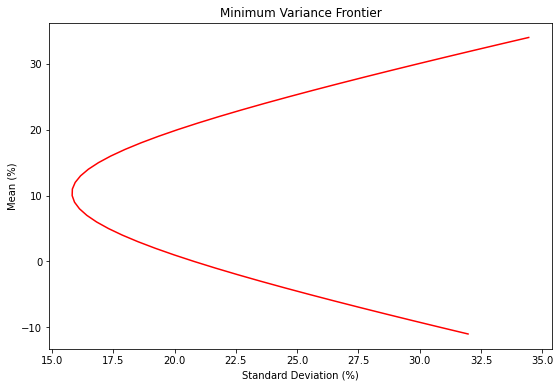

In [13]:
mu_range = np.arange(-0.11, 0.35, 0.01)
sigma_range = sigma_func(mu_range, cov, mu)

plt.figure(figsize = (9, 6))
plt.plot(100 * sigma_range, 100 * mu_range, color = 'r')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean (%)')
plt.title('Minimum Variance Frontier')
plt.show();

#### Gobal Min Variance Frontier

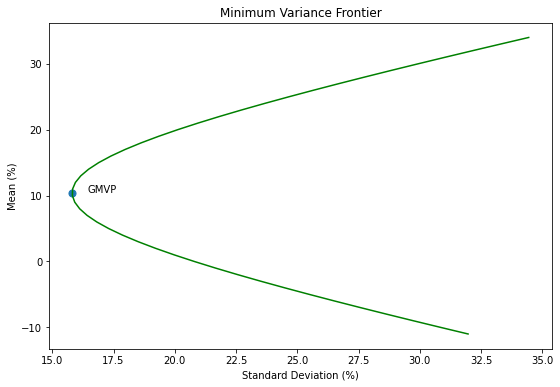

In [14]:
C = ones @ cov_inv @ ones
w_GMV = (cov_inv @ ones) / C
mu_GMV = w_GMV @ mu
sigma_GMV = np.sqrt(w_GMV @ cov @ w_GMV)

plt.figure(figsize = (9, 6))
plt.plot(100 * sigma_range, 100 * mu_range, color = 'g')
plt.scatter(100 * sigma_GMV, 100 * mu_GMV, s = 50)
plt.annotate('GMVP', (100 * sigma_GMV, 100 * mu_GMV), 
             xytext = (15, 0), 
             textcoords = 'offset points')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean (%)')
plt.title('Minimum Variance Frontier')
plt.show();

#### Portfolio Optimization With Short-Selling Constraints

In [15]:
def portfolio_var(w, cov):
    return w @ cov @ w

cons = [{'type': 'eq', 'fun': lambda w: np.vstack((mu, ones)) @ w - [0.20, 1]}]

non_neg = []
for i in mu:
    non_neg.append((0, None))
non_neg = tuple(non_neg)

res = minimize(portfolio_var, 
               x0 = w_init, 
               constraints = cons, 
               bounds = non_neg, 
               args = cov)

In [16]:
non_neg

((0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None),
 (0, None))

In [17]:
pd.DataFrame(data = 100 * res.x.round(4), index = tickers, columns = ['Portfolio Weights (%)'])

,Portfolio Weights (%)
AAPL,42.97
BA,8.00
C,0.00
GE,0.00
GM,3.75
JNJ,38.48
KO,5.01
WMT,1.79


In [18]:
def sigma_func_cons(mu_mv, cov):
    cons = [{'type': 'eq', 'fun': lambda w: np.vstack((mu, ones)) @ w - [mu_mv, 1]}]
    non_neg = []
    for i in mu:
        non_neg.append((0, None))
    non_neg = tuple(non_neg)
    res = minimize(portfolio_var, 
                   x0 = w_init, 
                   constraints = cons, 
                   bounds = non_neg, 
                   args = cov)
    if res.success == True:
        return np.sqrt(res.x @ cov @ res.x)

def portfolio_var_neg(w, cov):
    return - w @ cov @ w

def sigma_func_cons_neg(mu_mv, cov):
    cons = [{'type': 'eq', 'fun': lambda w: np.vstack((mu, ones)) @ w - [mu_mv, 1]}]
    non_neg = []
    for i in mu:
        non_neg.append((0, None))
    non_neg = tuple(non_neg)
    res = minimize(portfolio_var_neg, 
                   x0 = w_init, 
                   constraints = cons, 
                   bounds = non_neg, 
                   args = cov)
    if res.success == True:
        return np.sqrt(res.x @ cov @ res.x)
mu_range = np.arange(-0.11, 0.35, 0.001)

sigma_range = sigma_func(mu_range, cov, mu)

sigma_range_cons = np.array([])
for mu_target in mu_range:
    sigma_cons = sigma_func_cons(mu_target, cov)
    sigma_range_cons = np.append(sigma_range_cons, sigma_cons)

sigma_range_cons_neg = np.array([])
for mu_target in mu_range:
    sigma_cons_neg = sigma_func_cons_neg(mu_target, cov)
    sigma_range_cons_neg = np.append(sigma_range_cons_neg, sigma_cons_neg)

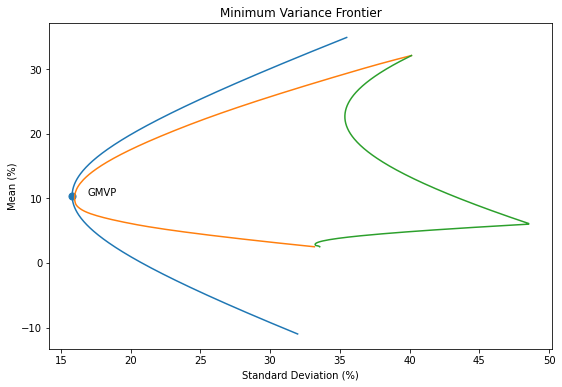

In [19]:
plt.figure(figsize = (9, 6))
plt.plot(100 * sigma_range, 100 * mu_range)
plt.plot(100 * sigma_range_cons[sigma_range_cons != np.array(None)], 100 * mu_range[sigma_range_cons != np.array(None)])
plt.plot(100 * sigma_range_cons_neg[sigma_range_cons_neg != np.array(None)], 100 * mu_range[sigma_range_cons_neg != np.array(None)])
plt.scatter(100 * sigma_GMV, 100 * mu_GMV, s = 50)
plt.annotate('GMVP', (100 * sigma_GMV, 100 * mu_GMV), 
             xytext = (15, 0), 
             textcoords = 'offset points')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Mean (%)')
plt.title('Minimum Variance Frontier')
plt.show();

#### N-Risky Assets and a Risk-Free Asset
Getting the Risk-Free Rate

In [20]:
ff = (pdr
      .famafrench
      .FamaFrenchReader('F-F_Research_Data_Factors', start = start_date, freq = 'M')
      .read()[0] / 100
     )
rf = 12 * ff[['RF']].mean().to_list()[0]

#### Computing the Weights of the Tangency Portfolio

In [21]:
mu_e = mu - rf * ones
w_Q = (cov_inv @ mu_e) / (mu_e @ cov_inv @ ones)
pd.DataFrame(data = 100* w_Q, index = tickers, columns = ['Portfolio Weights (%)'])

,Portfolio Weights (%)
AAPL,54.034372
BA,21.593482
C,-11.992529
GE,-42.489002
GM,17.360112
JNJ,46.297703
KO,7.184230
WMT,8.011632


In [22]:
(w_Q @ mu - rf) / np.sqrt(w_Q @ cov @ w_Q)

0.9546755127379286

In [23]:
def Sharpe_ratio_neg(w, cov, mu_e):
    return - (w @ mu_e) / np.sqrt(w @ cov @ w)

cons = [{'type': 'eq', 'fun': lambda w: ones @ w - 1}]

non_neg = []
for i in mu:
    non_neg.append((0, None))
non_neg = tuple(non_neg)

res = minimize(portfolio_var, 
                        x0 = w_init, 
                        constraints = cons, 
                        bounds = non_neg, 
                        args = cov)

pd.DataFrame(data = np.column_stack((100* w_Q.round(4), 100 * res.x.round(4))), 
             index = tickers, 
             columns = ['Unconstrained', 'Constrained'])

,Unconstrained,Constrained
AAPL,54.03,3.36
BA,21.59,0.00
C,-11.99,0.00
GE,-42.49,0.00
GM,17.36,7.66
JNJ,46.30,38.45
KO,7.18,28.70
WMT,8.01,21.83
